# Классификация объектов по цвету

In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

Подгрузим примеры из набора данных и посмотрим на них

Text(0.5, 1.0, 'Yellow light')

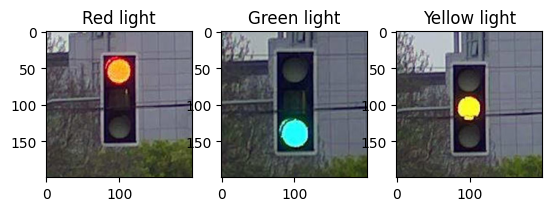

In [89]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

#red light
red_img_bgr = cv.imread('tlights/200_57.jpg')
red_img_rgb = cv.cvtColor(red_img_bgr, cv.COLOR_BGR2RGB) #to rgb
ax1.imshow(red_img_rgb)
ax1.set_title('Red light')

#green light
green_img_bgr = cv.imread('tlights/200_56.jpg')
green_img_rgb = cv.cvtColor(green_img_bgr, cv.COLOR_BGR2RGB) #to rgb
ax2.imshow(green_img_rgb)
ax2.set_title('Green light')

#yellow light
yellow_img_bgr = cv.imread('tlights/200_55.jpg')
yellow_img_rgb = cv.cvtColor(yellow_img_bgr, cv.COLOR_BGR2RGB) #to rgb
ax3.imshow(yellow_img_rgb)
ax3.set_title('Yellow light')

Построим гистограммы по количеству пикселей определенного значения для каждого цвета. Как можно заметить, так просто по изображению в rgb его не классифицировать.

Text(0.5, 1.0, 'yellow')

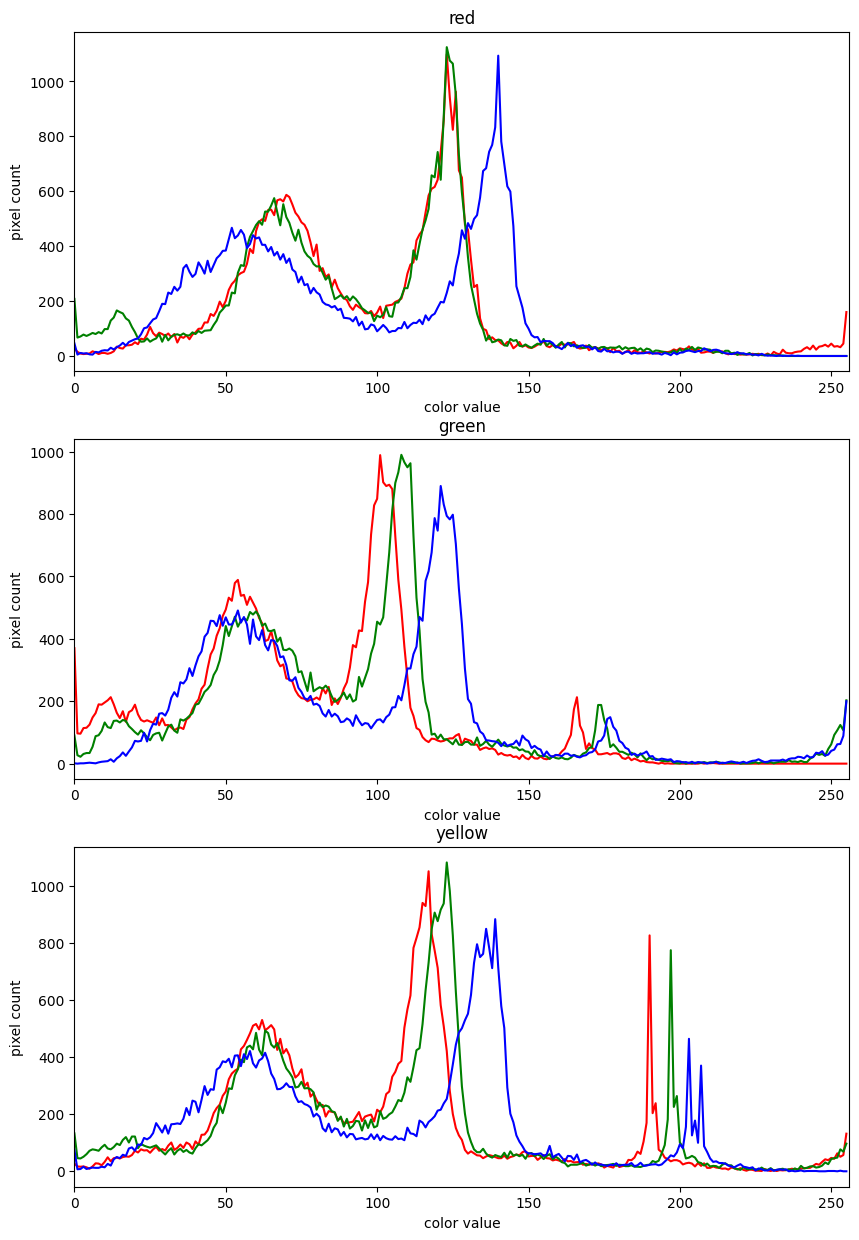

In [90]:
#list of color channels in rgb
colors = ("red", "green", "blue")
#histogram plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(10)

#red
ax1.set_xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        red_img_rgb[:, :, channel_id], bins=256, range=(0, 256)
    )
    ax1.plot(histogram, color=color)

ax1.set_xlabel("color value")
ax1.set_ylabel("pixel count")
ax1.set_title("red")

#green
ax2.set_xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        green_img_rgb[:, :, channel_id], bins=256, range=(0, 256)
    )
    ax2.plot(histogram, color=color)

ax2.set_xlabel("color value")
ax2.set_ylabel("pixel count")
ax2.set_title("green")

#yellow
ax3.set_xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        yellow_img_rgb[:, :, channel_id], bins=256, range=(0, 256)
    )
    ax3.plot(histogram, color=color)

ax3.set_xlabel("color value")
ax3.set_ylabel("pixel count")
ax3.set_title("yellow")

Выделим только области с горящим цветом

Text(0, 0.5, 'pixel count')

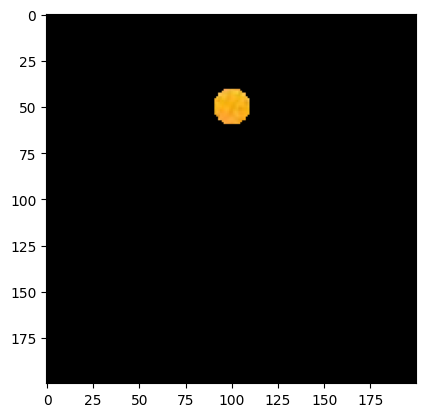

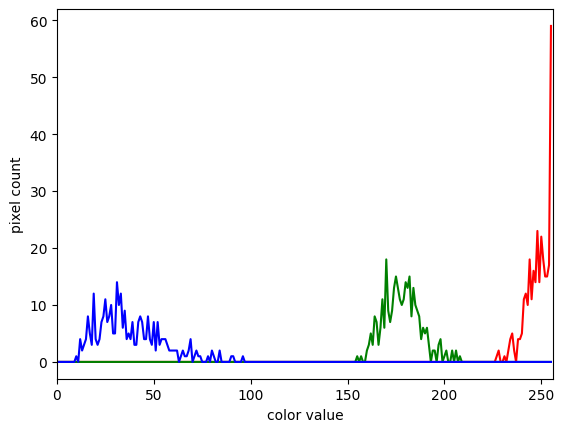

In [91]:
wellplate = np.copy(red_img_rgb)
mask = np.zeros(shape = wellplate.shape[0:2], dtype='bool') #mask
circle = ski.draw.disk(center=(50, 100), radius=10, shape=wellplate.shape[0:2]) #circle of light
mask[circle] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0

fig, ax = plt.subplots()
plt.imshow(masked_img)

#colors
colors = ("red", "green", "blue")

#hist plot for each color
plt.figure()
plt.xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        wellplate[:, :, channel_id][mask], bins=256, range=(0, 256)
    )
    plt.plot(histogram, color=color)

plt.xlabel("color value")
plt.ylabel("pixel count")


Для красного цвета имеем большое число красных пикселей.

Text(0, 0.5, 'pixel count')

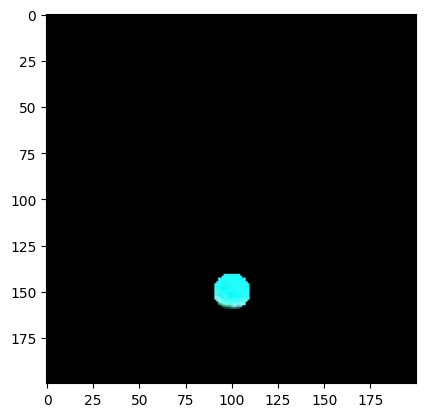

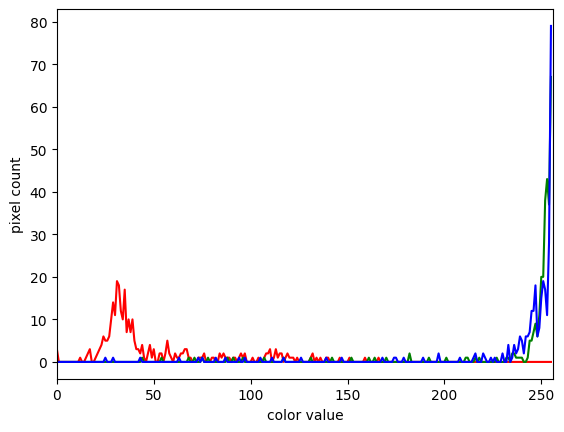

In [92]:
wellplate = np.copy(green_img_rgb)
mask = np.zeros(shape = wellplate.shape[0:2], dtype='bool') #mask
circle = ski.draw.disk(center=(150, 100), radius=10, shape=wellplate.shape[0:2]) #circle of light
mask[circle] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0

fig, ax = plt.subplots()
plt.imshow(masked_img)

#colors
colors = ("red", "green", "blue")

#hist plot for each color
plt.figure()
plt.xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        wellplate[:, :, channel_id][mask], bins=256, range=(0, 256)
    )
    plt.plot(histogram, color=color)

plt.xlabel("color value")
plt.ylabel("pixel count")

Зеленый свет светофора в примере имеет бирюзовый оттенок, много пикселей с высокими значениями синего и зеленого.

Text(0, 0.5, 'pixel count')

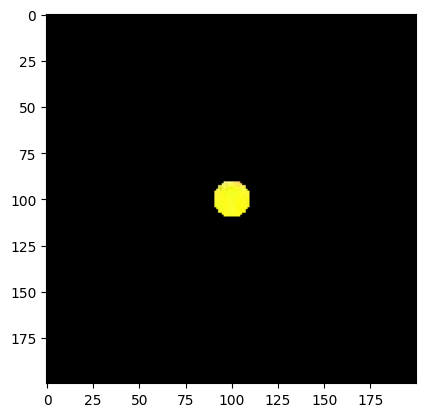

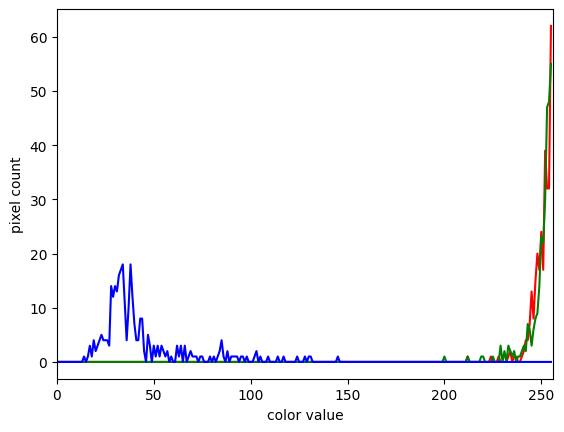

In [93]:
wellplate = np.copy(yellow_img_rgb)
mask = np.zeros(shape = wellplate.shape[0:2], dtype='bool') #mask
circle = ski.draw.disk(center=(100, 100), radius=10, shape=wellplate.shape[0:2]) #circle of light
mask[circle] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0

fig, ax = plt.subplots()
plt.imshow(masked_img)

#colors
colors = ("red", "green", "blue")

#hist plot for each color
plt.figure()
plt.xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        wellplate[:, :, channel_id][mask], bins=256, range=(0, 256)
    )
    plt.plot(histogram, color=color)

plt.xlabel("color value")
plt.ylabel("pixel count")

Для желтого цвета получаем большое число пикселей с выраженностью красного и зеленого цвета.

Переведем изображения в формат HSV и воспользуемся всеми тремя параметрами для определения цвета.

Text(0.5, 1.0, 'RGB')

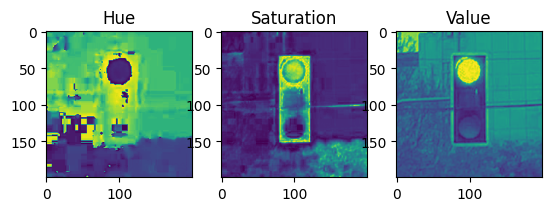

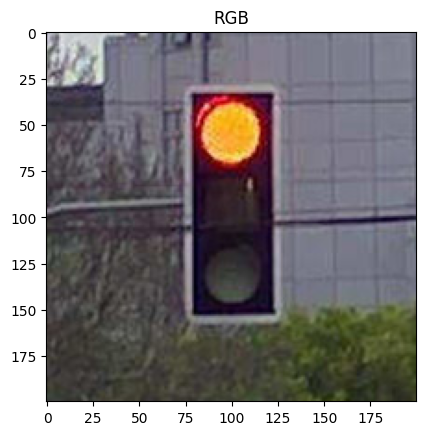

In [94]:
red_img_hsv = cv.cvtColor(red_img_rgb, cv.COLOR_RGB2HSV)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(red_img_hsv[:,:,0])
ax1.set_title("Hue")
ax2.imshow(red_img_hsv[:,:,1])
ax2.set_title("Saturation")
ax3.imshow(red_img_hsv[:,:,2])
ax3.set_title("Value")

plt.figure()
plt.imshow(red_img_rgb)
plt.title("RGB")

Text(0.5, 1.0, 'RGB')

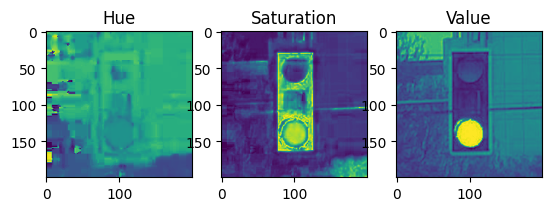

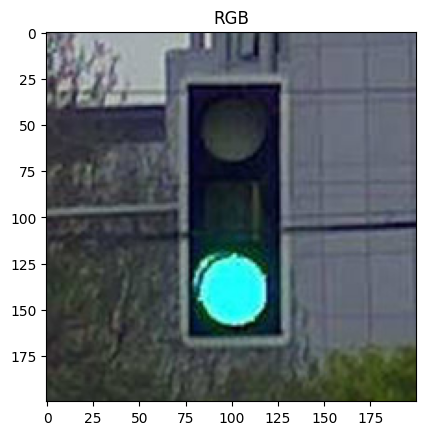

In [95]:
green_img_hsv = cv.cvtColor(green_img_rgb, cv.COLOR_RGB2HSV)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(green_img_hsv[:,:,0])
ax1.set_title("Hue")
ax2.imshow(green_img_hsv[:,:,1])
ax2.set_title("Saturation")
ax3.imshow(green_img_hsv[:,:,2])
ax3.set_title("Value")

plt.figure()
plt.imshow(green_img_rgb)
plt.title("RGB")

Text(0.5, 1.0, 'RGB')

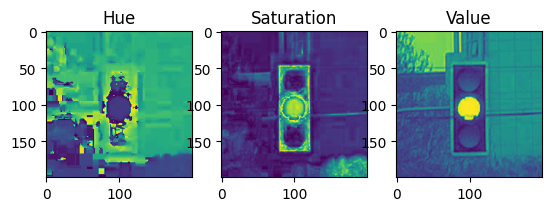

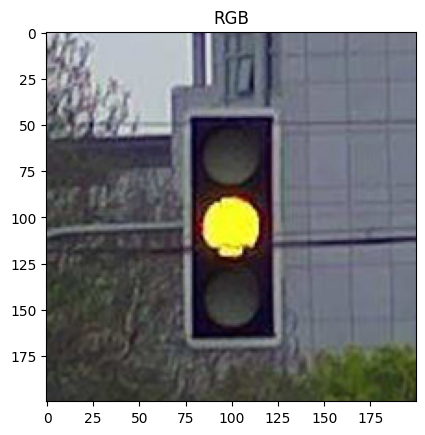

In [96]:
yellow_img_hsv = cv.cvtColor(yellow_img_rgb, cv.COLOR_RGB2HSV)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(yellow_img_hsv[:,:,0])
ax1.set_title("Hue")
ax2.imshow(yellow_img_hsv[:,:,1])
ax2.set_title("Saturation")
ax3.imshow(yellow_img_hsv[:,:,2])
ax3.set_title("Value")

plt.figure()
plt.imshow(yellow_img_rgb)
plt.title("RGB")

 Hue зависит от цвета, а Saturation показывает насколько цвет "чище", соответсвенно поставим порог по Saturation от 100, порог по value поставим 150

Выделим красный цвет

Text(0, 0.5, 'pixel count')

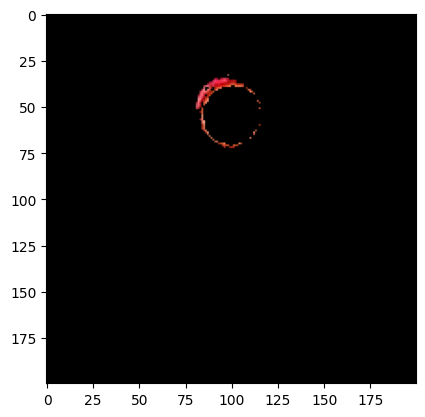

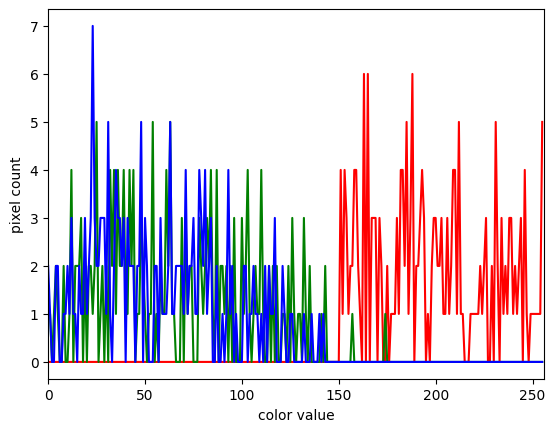

In [97]:
wellplate = np.copy(red_img_rgb)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
x = np.where(((red_img_hsv[:,:,0] > 170) | (red_img_hsv[:,:,0] < 10)) & (red_img_hsv[:,:,1] > 100) & (red_img_hsv[:,:,2] > 150)) #red
mask[x] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
plt.imshow(masked_img)

#colors
colors = ("red", "green", "blue")

#hist plot for each color
plt.figure()
plt.xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        wellplate[:, :, channel_id][mask], bins=256, range=(0, 256)
    )
    plt.plot(histogram, color=color)

plt.xlabel("color value")
plt.ylabel("pixel count")

Выделим зеленый цвет

Text(0, 0.5, 'pixel count')

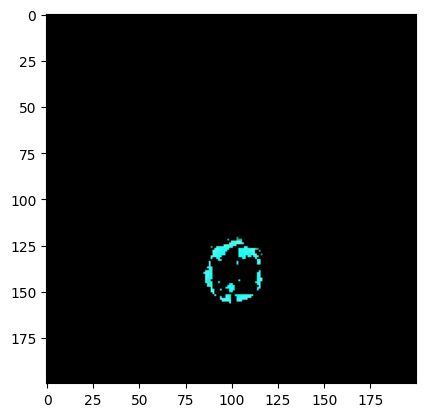

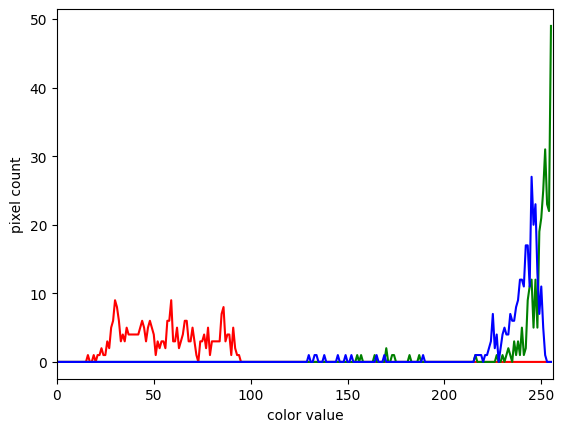

In [98]:
wellplate = np.copy(green_img_rgb)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
x = np.where( (green_img_hsv[:,:,0] > 50) & (green_img_hsv[:,:,0] < 90) & (green_img_hsv[:,:,1] > 160) & (green_img_hsv[:,:,2] > 150))#cyan
mask[x] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
plt.imshow(masked_img)

#colors
colors = ("red", "green", "blue")

#hist plot for each color
plt.figure()
plt.xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        wellplate[:, :, channel_id][mask], bins=256, range=(0, 256)
    )
    plt.plot(histogram, color=color)

plt.xlabel("color value")
plt.ylabel("pixel count")

Выделим желтый цвет

Text(0, 0.5, 'pixel count')

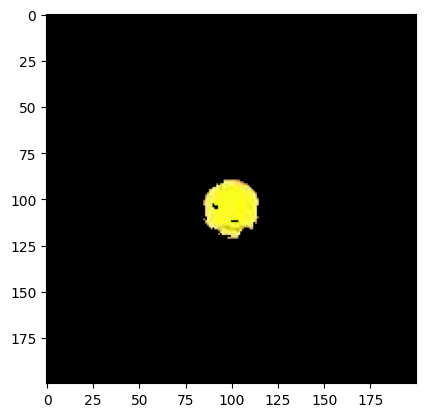

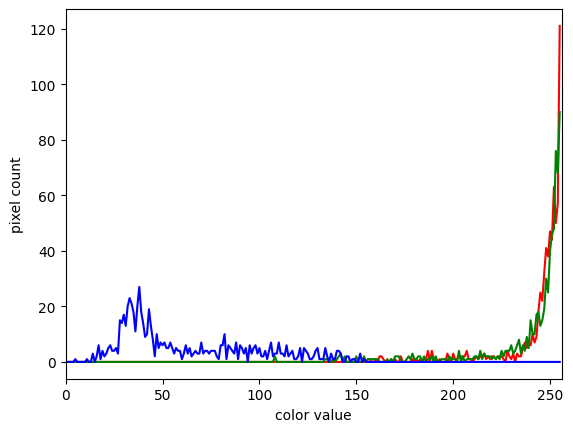

In [99]:
wellplate = np.copy(yellow_img_rgb)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
x = np.where( (yellow_img_hsv[:,:,0] > 15) & (yellow_img_hsv[:,:,0] < 32) & (yellow_img_hsv[:,:,1] > 100) & (yellow_img_hsv[:,:,2] > 150)) #yellow
mask[x] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
plt.imshow(masked_img)

#colors
colors = ("red", "green", "blue")

#hist plot for each color
plt.figure()
plt.xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        wellplate[:, :, channel_id][mask], bins=256, range=(0, 256)
    )
    plt.plot(histogram, color=color)

plt.xlabel("color value")
plt.ylabel("pixel count")

Напишем функцию для определения цвета светофора на изображении.

In [111]:
def traffic_light_color(filepath: str) -> str:
    '''
    This functon takes as an argument path to picture
    returns str: ['yellow', 'red', 'green'])
    '''
    img_bgr = cv.imread(filepath)
    img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)# bgr to hsv


    #mask for red
    wellplate = np.copy(img_bgr)
    mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
    x = np.where(((img_hsv[:,:,0] > 175) | (img_hsv[:,:,0] < 10)) & (img_hsv[:,:,1] > 100) & (img_hsv[:,:,2] > 150))#red
    mask[x] = 1
    red = mask.sum()

  

    #mask for green
    wellplate = np.copy(img_bgr)
    mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
    x = np.where( (img_hsv[:,:,0] > 50) & (img_hsv[:,:,0] < 90) & (img_hsv[:,:,1] > 100) & (img_hsv[:,:,2] > 150))#green
    mask[x] = 1
    green = mask.sum()

    #mask for yellow
    wellplate = np.copy(img_bgr)
    mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
    x = np.where( (img_hsv[:,:,0] > 15) & (img_hsv[:,:,0] < 40) & (img_hsv[:,:,1] > 100) & (img_hsv[:,:,2] > 150))#yellow
    mask[x] = 1
    yellow = mask.sum()

    if red >= 20:
        return 'red'##проблема в том, что часто в красном очень много желтого.
    elif red >= green and red >= yellow:
        return 'red'
    elif green >= red and green >= yellow:
        return 'green'
    elif yellow >= red and yellow >= green:
        return 'yellow'
    
    else:
        return -1
    

In [112]:
current_color = traffic_light_color('tlights/200_45.jpg')
current_color

'green'

Процесс классификации:

In [113]:
import os 

if not os.path.exists('results'):
    os.mkdir('results')

# files with results
red_file = open('results/red.txt', 'w+')
green_file = open('results/green.txt', 'w+')
yellow_file = open('results/yellow.txt', 'w+')

directory = os.fsencode('tlights')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    filepath = os.path.join('tlights/', filename)
    current_color = traffic_light_color(filepath)
    #write in pasrticular file
    if current_color == 'red':
        red_file.write(f'{filename} \n')
    if current_color == 'green':
        green_file.write(f'{filename} \n')
    if current_color == 'yellow':
        yellow_file.write(f'{filename} \n')

#close files
red_file.close()
yellow_file.close()
green_file.close()